# Topic Modeling para cada desafío

En esta notebook se realiza Topic Modeling con una variedad de metodos:

1. Latent Semantic Analysis (LSA)
2. Latent Dirichlet Allocation (LDA)
1. BERTopic

In [1]:
%%capture
!pip install -r requirements.txt --user

In [1]:
import pandas as pd
import regex as re
import unidecode
import nltk
import spacy

path_to_MyModule = '..'

import sys
sys.path.insert(0, path_to_MyModule) 

from MyModule.TopicModelingFunctinos import *
from MyModule.GeneralFunctions import *

In [2]:
df = pd.read_excel('../datos.xlsx')[['ID','texto','desafio']]

In [3]:
# Limpieza
df.drop_duplicates(subset='texto', inplace=True)

# Quitando texto de mas en columna "desafio"
df['desafio'] = df['desafio'].apply(lambda x: re.findall('[0-9]+', x)[0])

# A str
df['texto'] = df['texto'].astype(str)

# Pre process and tokenization

In [5]:
%%capture
# for the preprocessing class.
!python -m spacy download es_core_news_lg

In [4]:
pp = Preprocess()
df['prepro_text'] = pp.preprocess(df['texto'])

# dict with desafio and its preprocesed texts
df_desafio = {}
for des in df.desafio.unique():
    value = df[df['desafio']==des].prepro_text.tolist()
    df_desafio[des] = value

# Exploratory Data Analysis

In [7]:
print('Cantidad de documentos por desafio:')
df['desafio'].value_counts()

Cantidad de documentos por desafio:


13    95
15    83
16    78
12    67
14    64
17    61
18    57
Name: desafio, dtype: int64

# Topic Modeling

## 1. Latent Semantic Analysis

A continuacion, las palabras mas importantes para cada uno de los tópicos encontrados por LSA para cada uno de
los desafios.

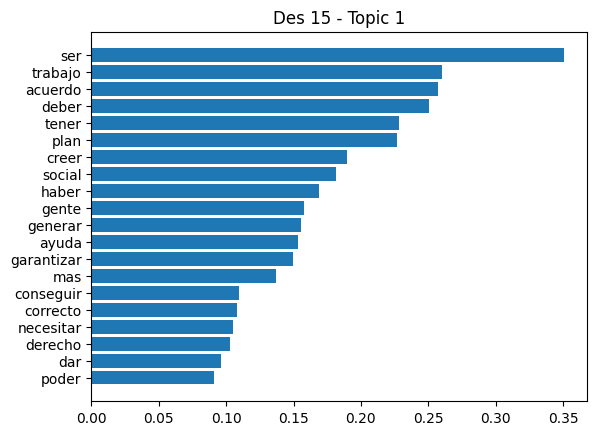

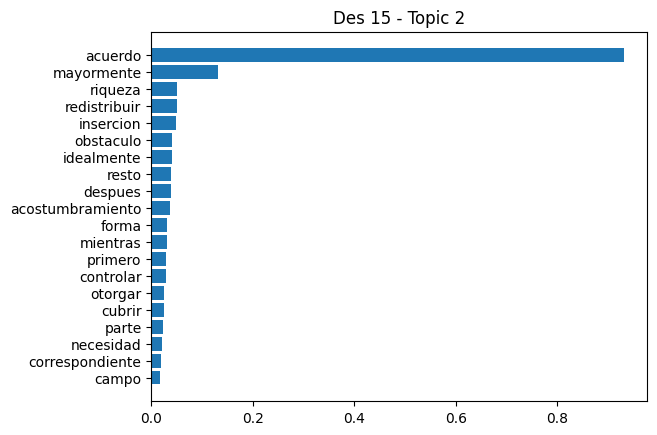

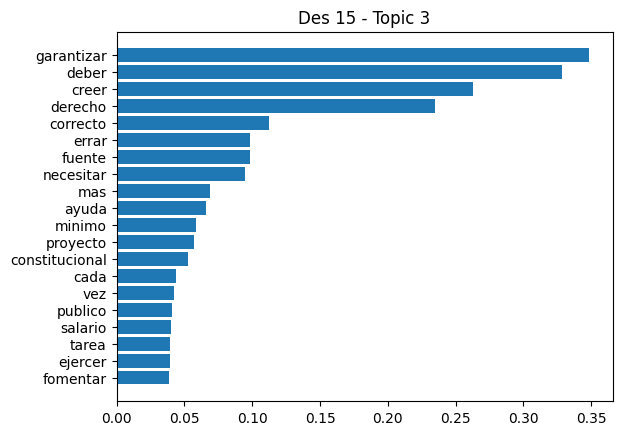

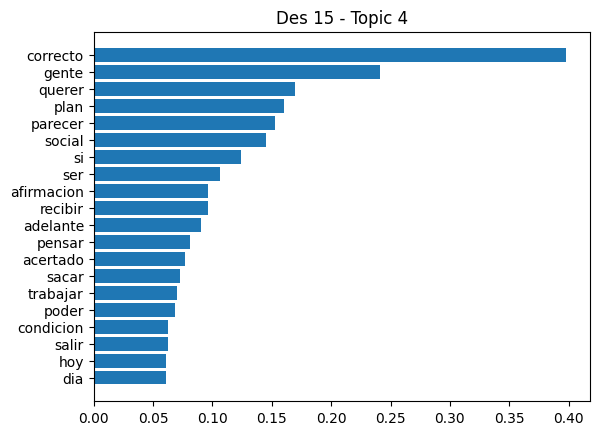

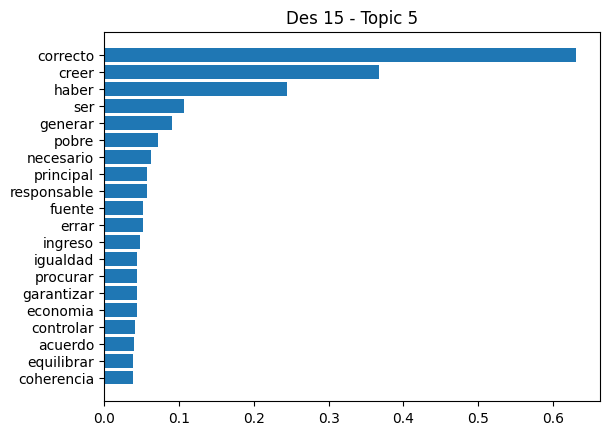

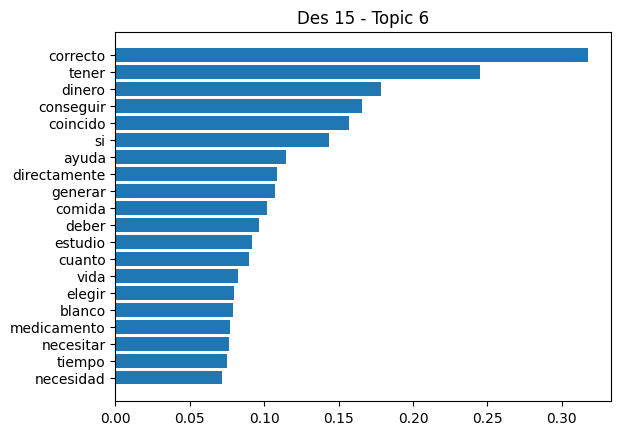

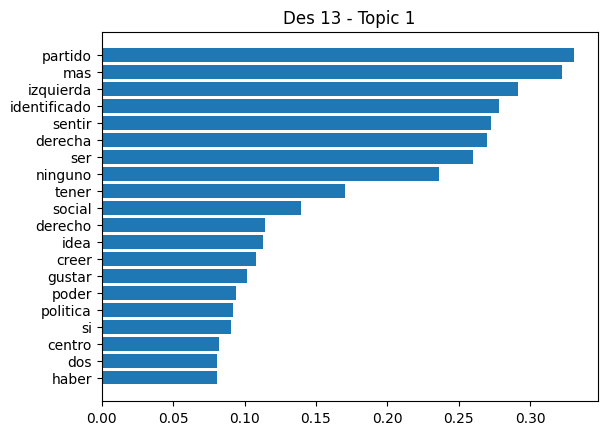

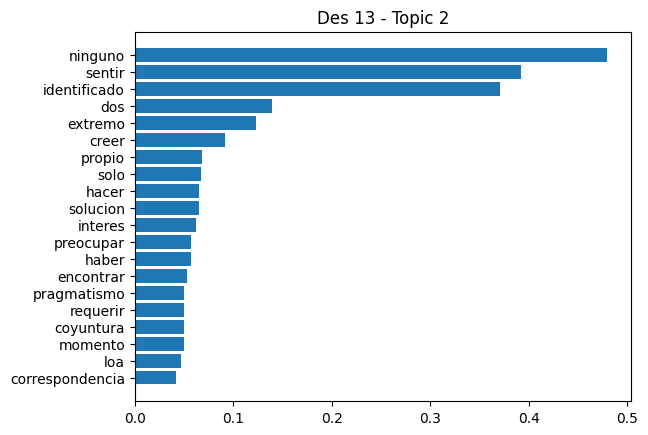

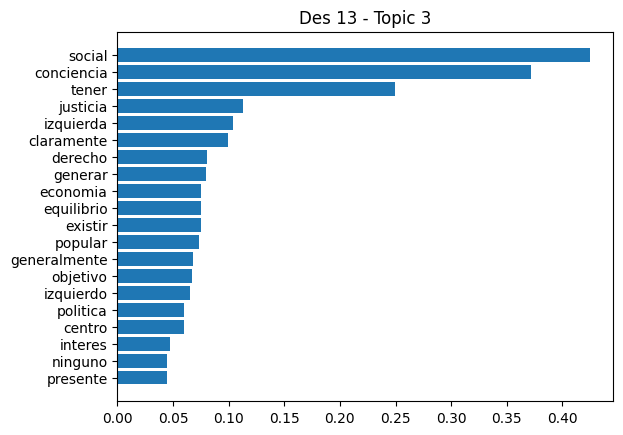

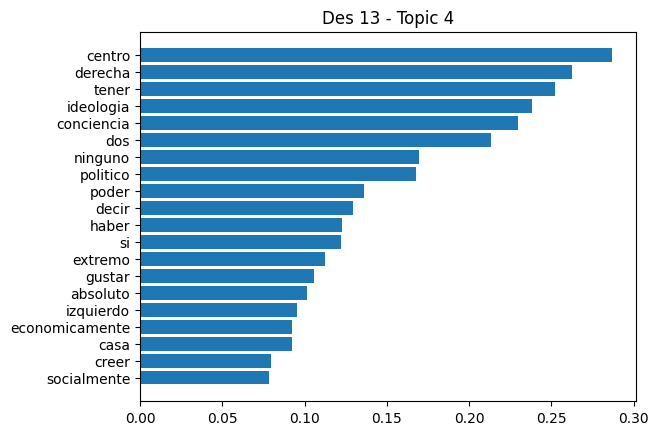

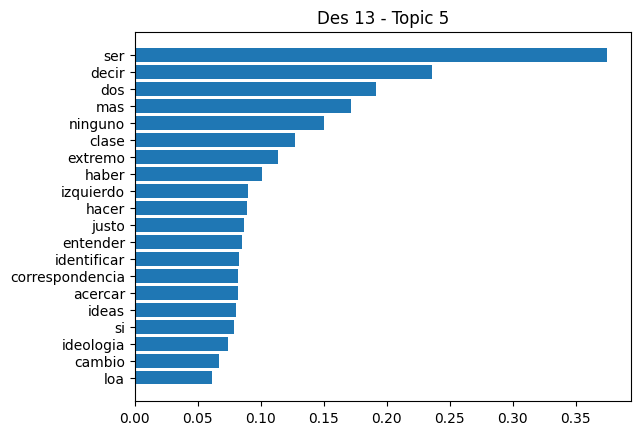

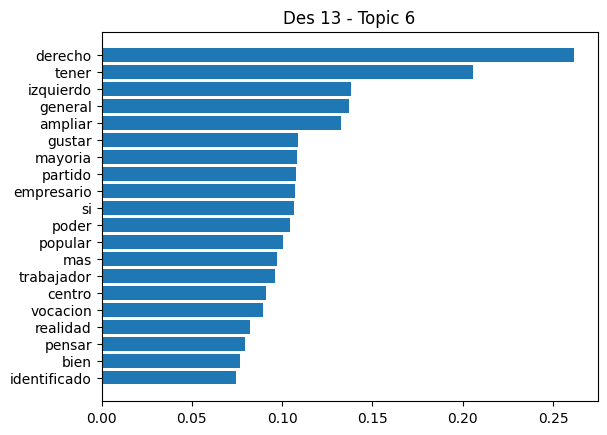

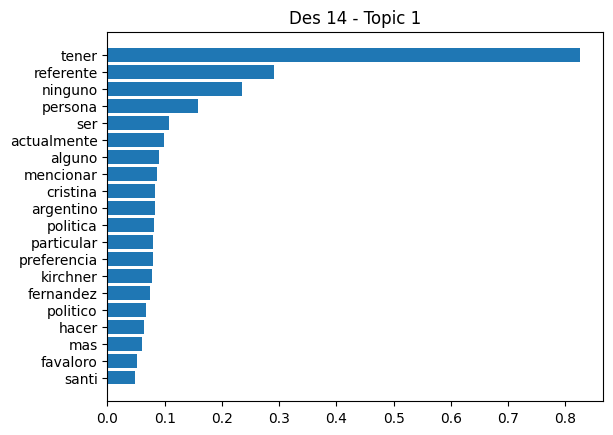

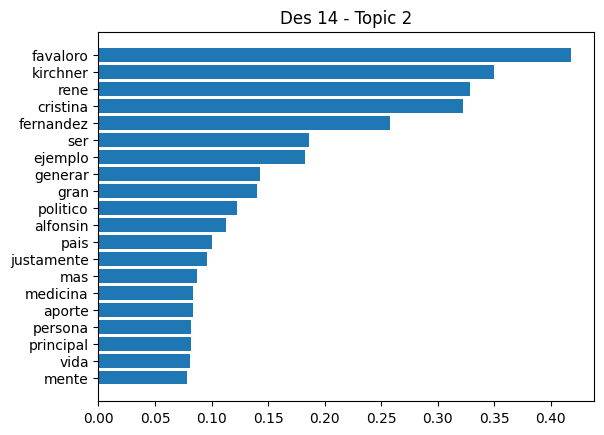

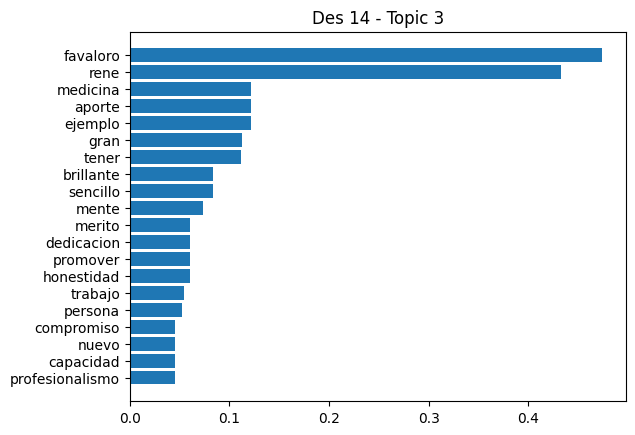

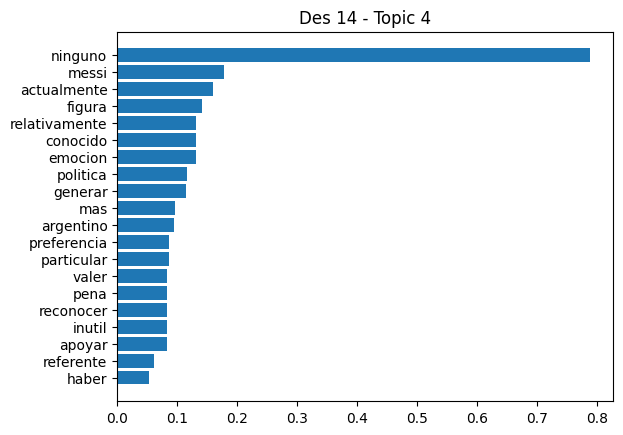

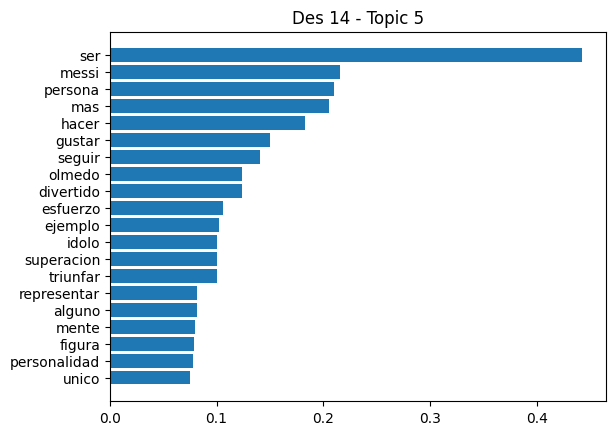

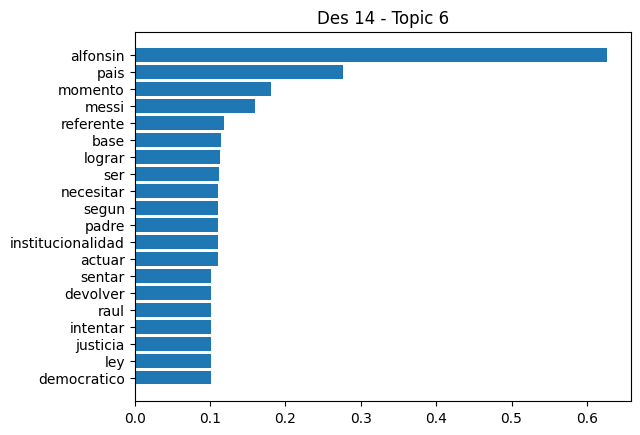

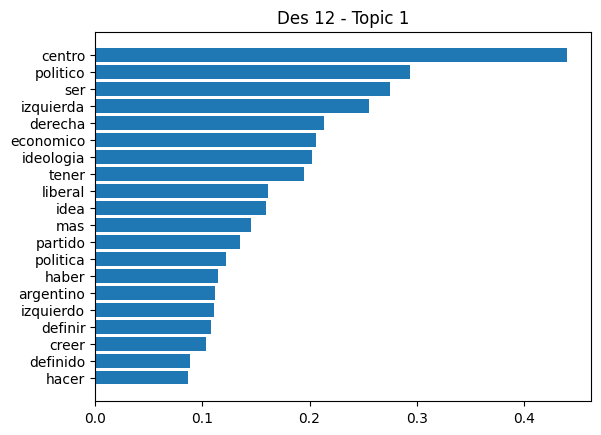

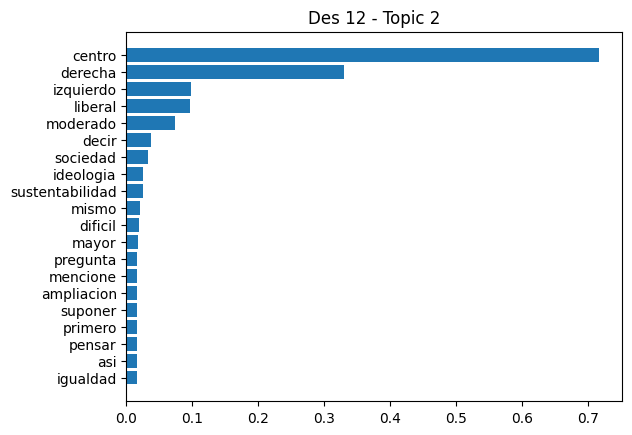

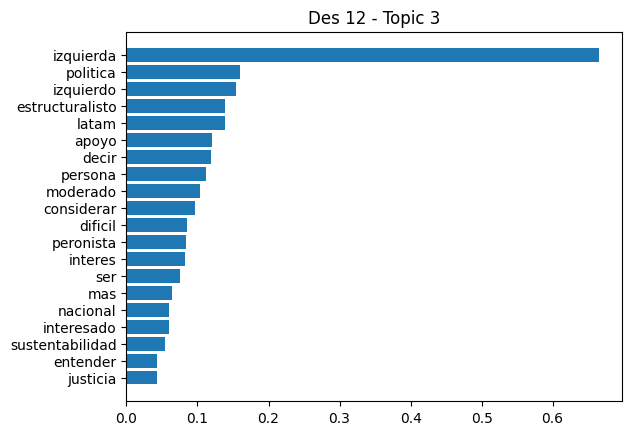

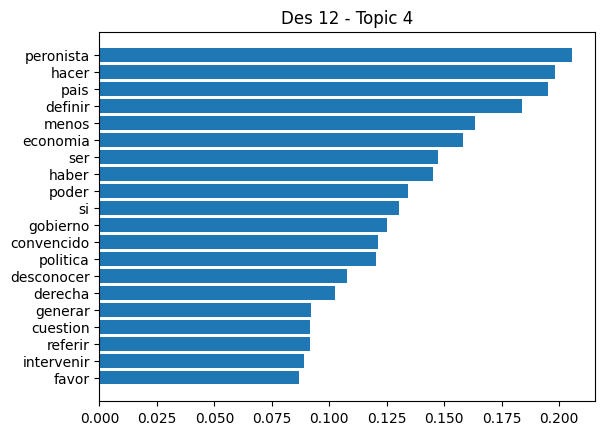

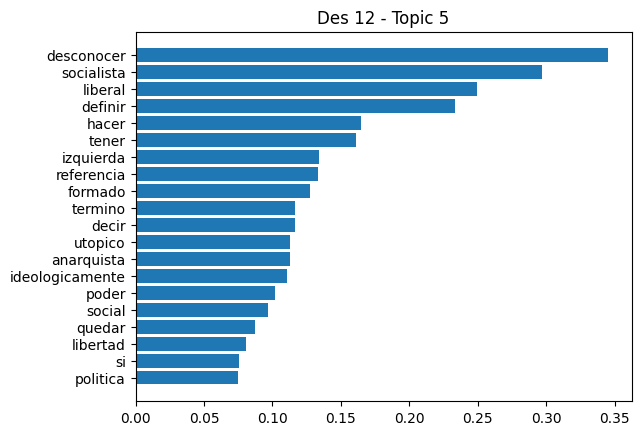

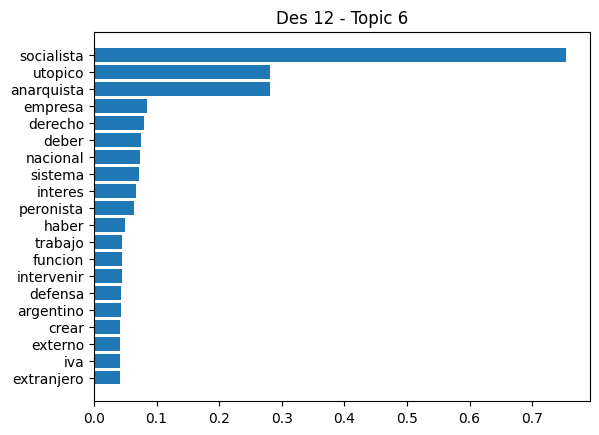

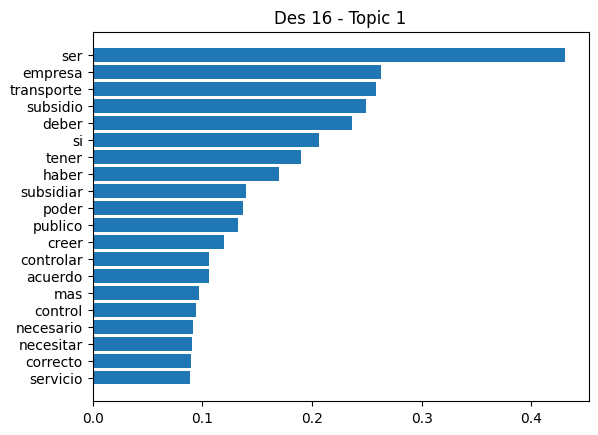

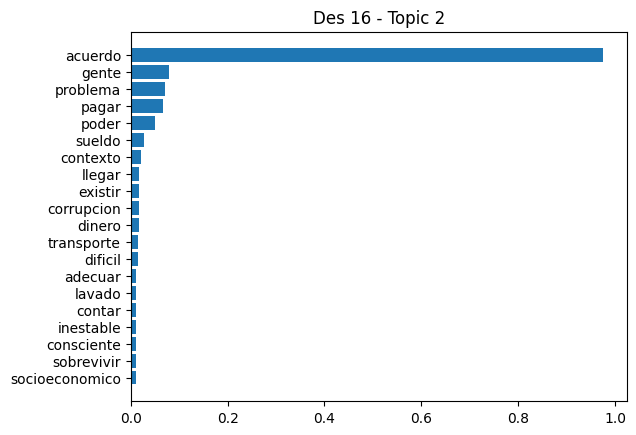

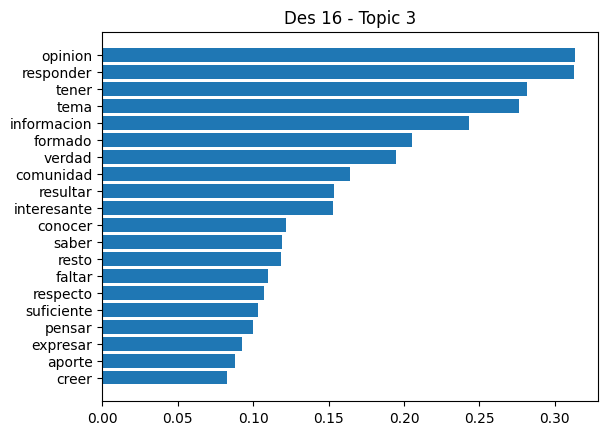

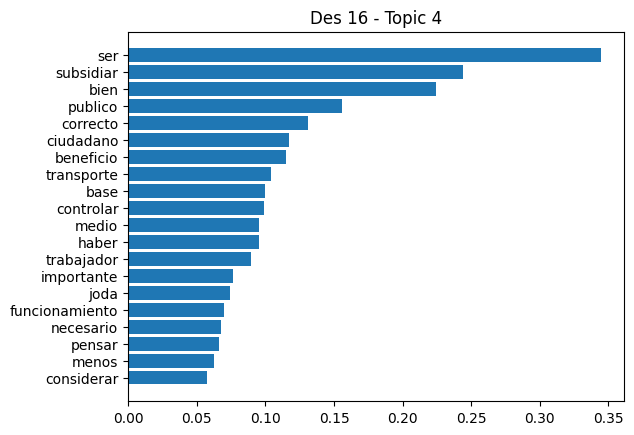

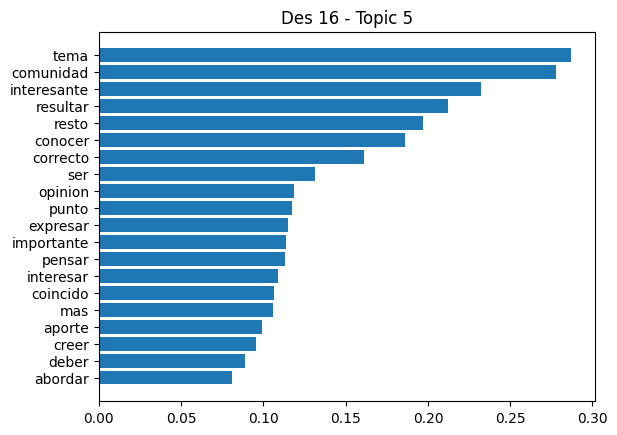

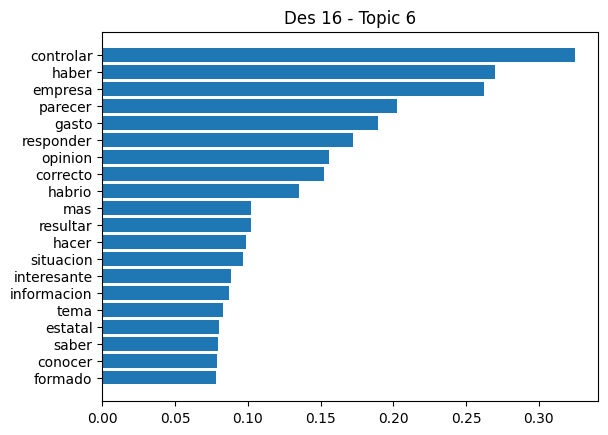

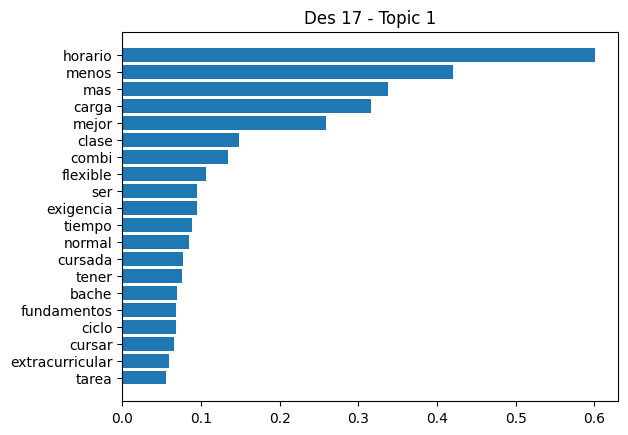

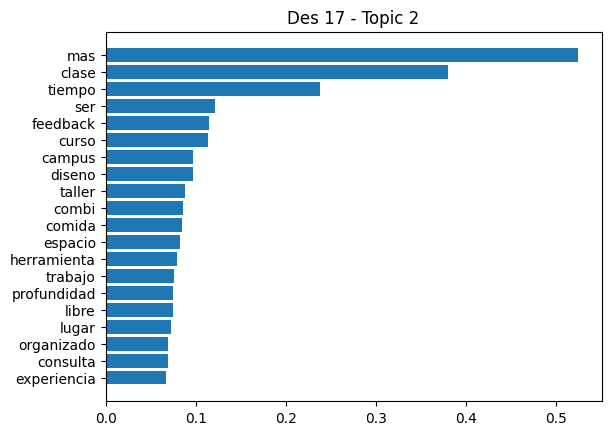

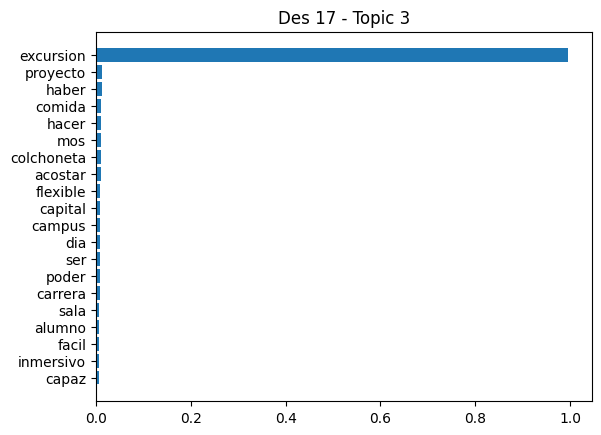

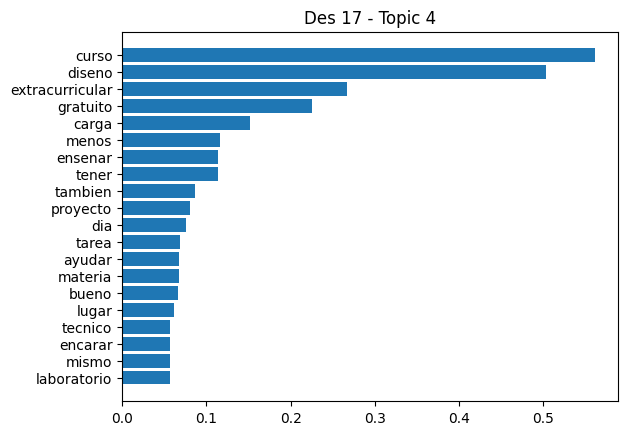

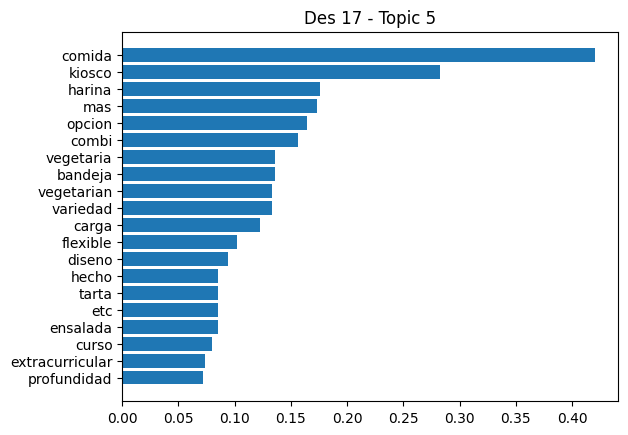

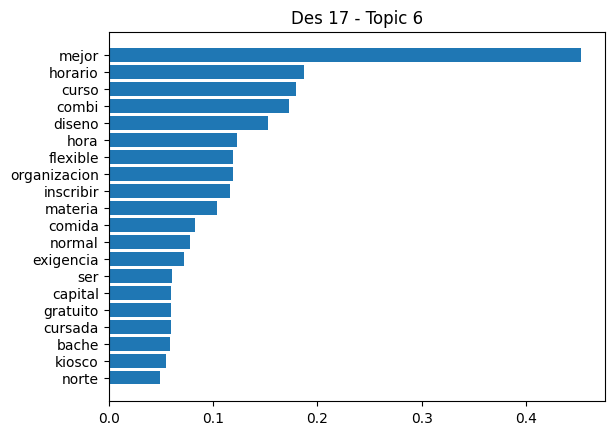

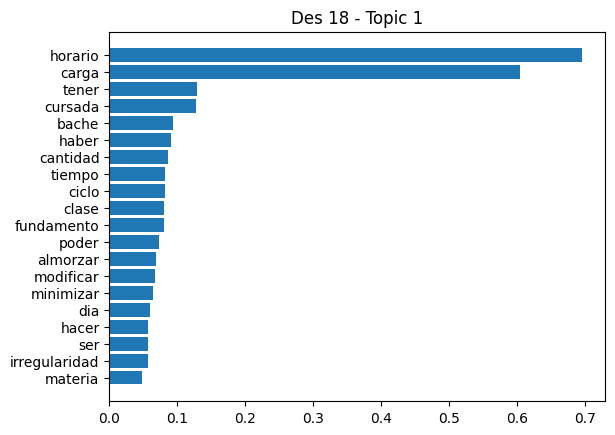

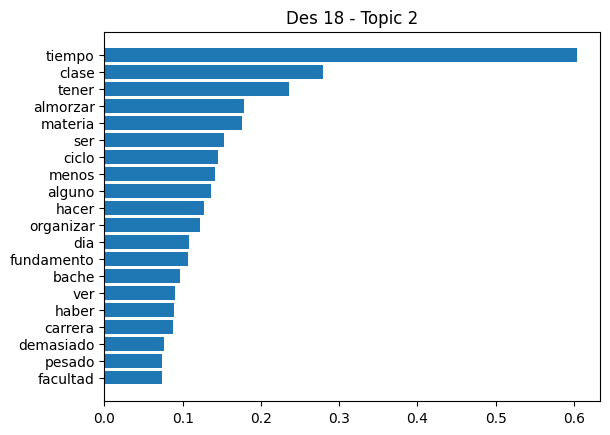

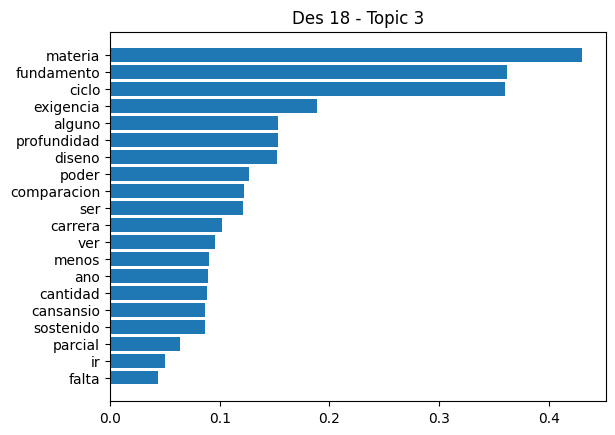

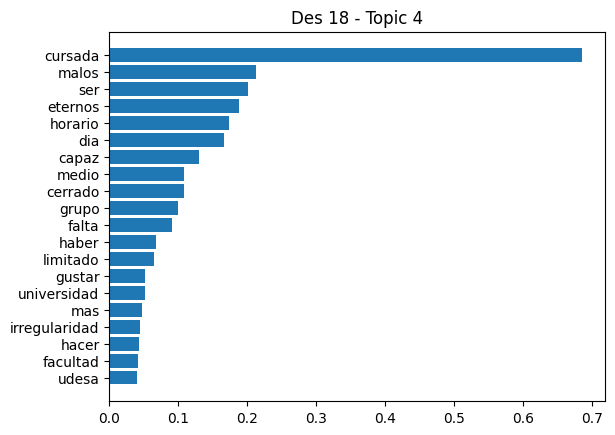

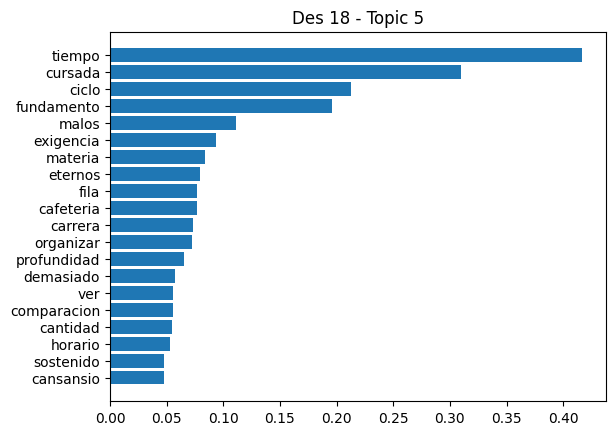

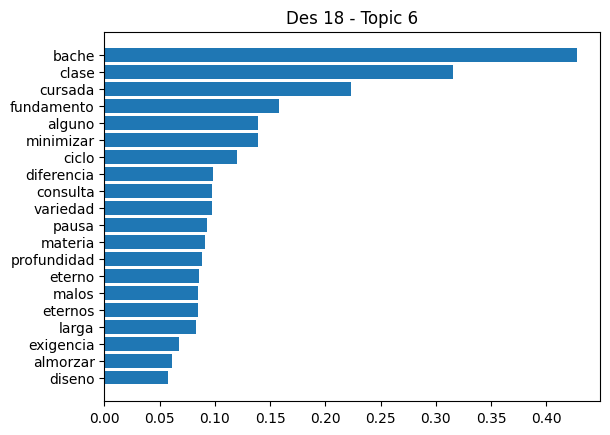

In [6]:
# Define data and model

n_components = 6 # nro de topicos a encontrar por desafío

for des, textos in df_desafio.items():
    
    model = TruncatedSVD

    words, wheights = words_wheights(model, textos, n_components)


    for i in range(n_components):
        plot_word(words[i], wheights[i], plot_title = f'Des {des} - Topic {i+1}')

### Evaluacion

Recordemos que la cantidad de tópicos a encontrar es un hiperparametro. Para encontrar la cantidad óptima de tópicos, podemos realizar los siguientes pasos:

1. aumentar iterativamente la cantidad de tópicos a encontrar
2. evaluar la similitud coseno promedio entre todos los pares de tópicos (cuantos mas tópicos, menor sera la similitud promedio)
3. graficar la relacion entre cantidad de tópicos y similitud entre ellos
4. decidir el numero optimo de tópicos

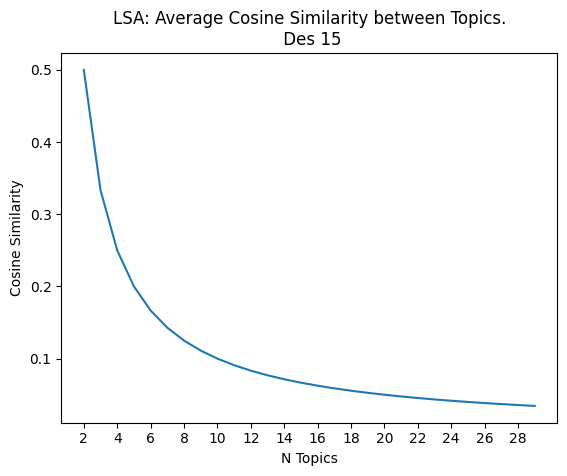

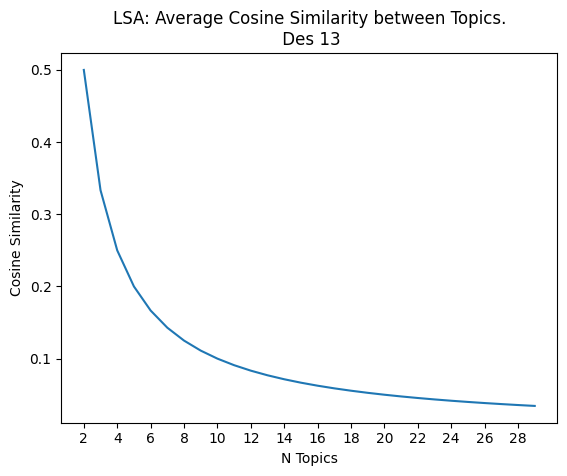

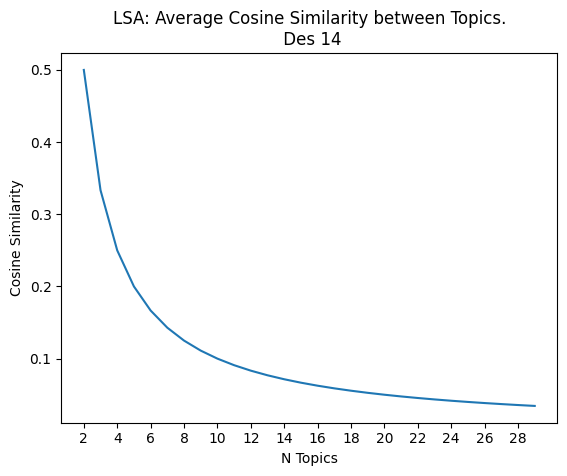

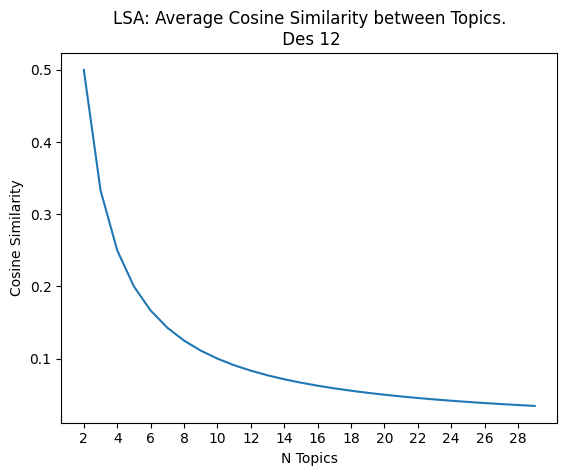

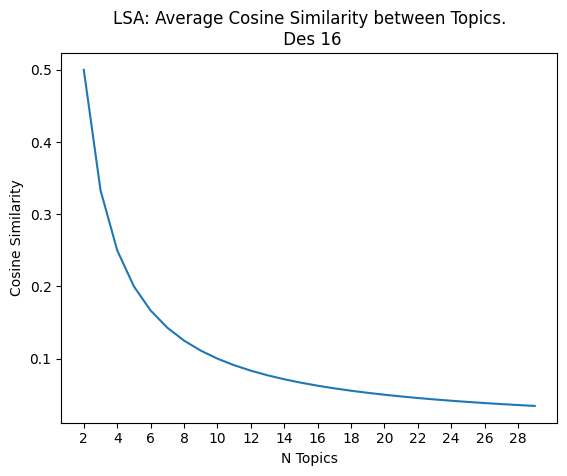

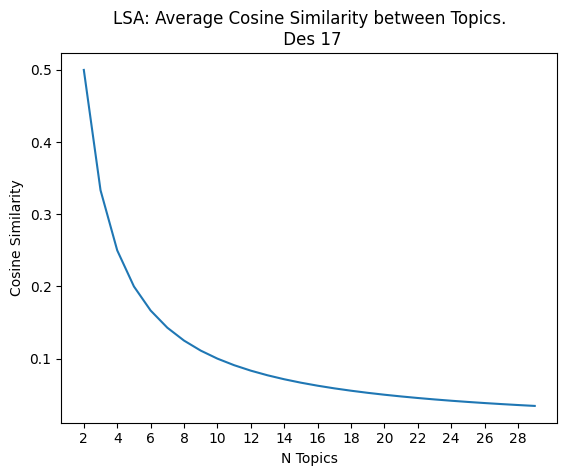

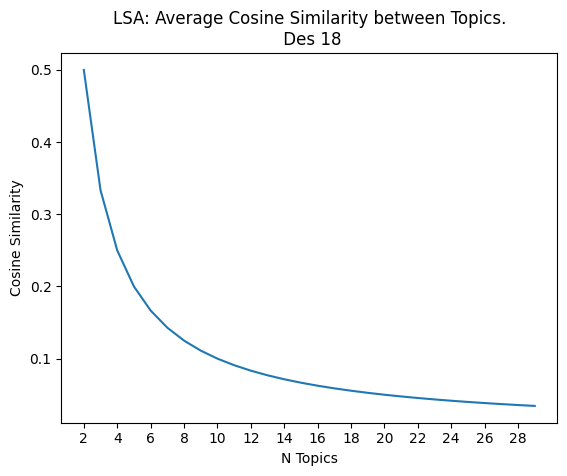

In [15]:
for des, textos in df_desafio.items():
    
    n_topics = 30

    all_cs = []
    for i in range(2, n_topics):
        mean_cos_simil = evaluate_coherence(model, textos, n_topics = i)
        all_cs.append(mean_cos_simil)

    plt.plot(range(2, n_topics), all_cs)
    plt.title(f'LSA: Average Cosine Similarity between Topics.\n Des {des}')
    plt.xlabel('N Topics')
    plt.ylabel('Cosine Similarity')
    plt.xticks(range(2, n_topics, 2), range(2, n_topics, 2))
    plt.show()

Reducimos la dimensionalidad de los topicos en dos dimensiones y graficamos su distribucion

Every topic with its most relevant words.


Topic 0 = ser, trabajo, acuerdo, deber

Topic 1 = acuerdo, mayormente, riqueza, redistribuir

Topic 2 = garantizar, deber, creer, derecho

Topic 3 = correcto, gente, querer, parecer

Topic 4 = correcto, creer, haber, pobre



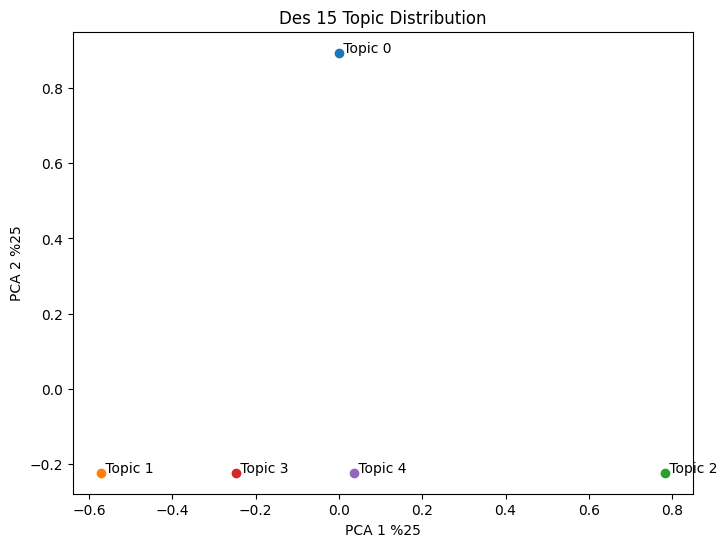

Every topic with its most relevant words.


Topic 0 = partido, mas, izquierda, identificado

Topic 1 = ninguno, sentir, identificado, dos

Topic 2 = social, conciencia, tener, justicia

Topic 3 = centro, derecha, tener, ideologia

Topic 4 = ser, decir, mas, dos



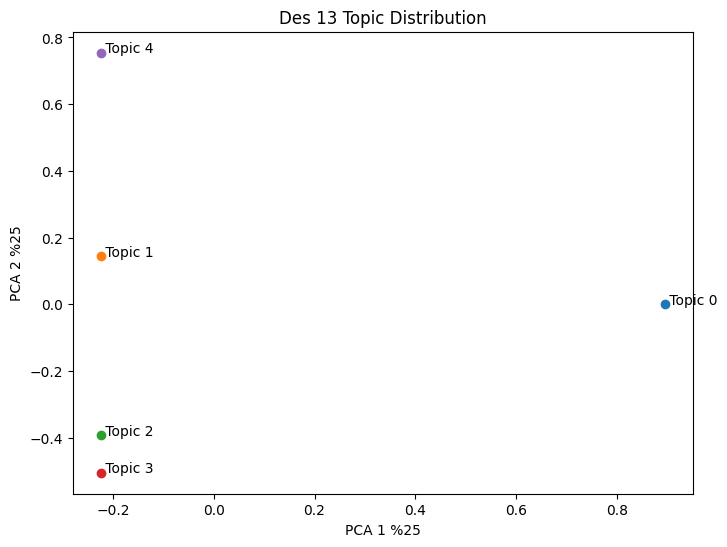

Every topic with its most relevant words.


Topic 0 = tener, referente, ninguno, persona

Topic 1 = favaloro, kirchner, rene, cristina

Topic 2 = favaloro, rene, aporte, medicina

Topic 3 = ninguno, messi, actualmente, figura

Topic 4 = ser, messi, persona, mas



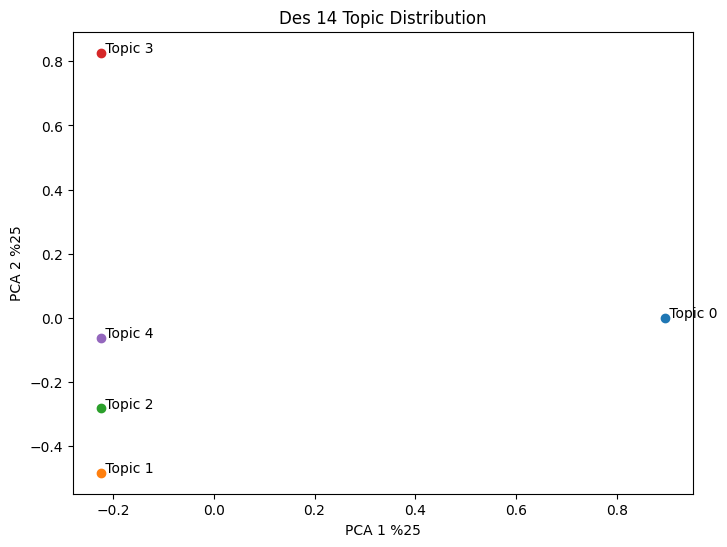

Every topic with its most relevant words.


Topic 0 = centro, politico, ser, izquierda

Topic 1 = centro, derecha, izquierdo, liberal

Topic 2 = izquierda, izquierdo, politica, estructuralisto

Topic 3 = peronista, hacer, pais, definir

Topic 4 = liberal, desconocer, definir, formado



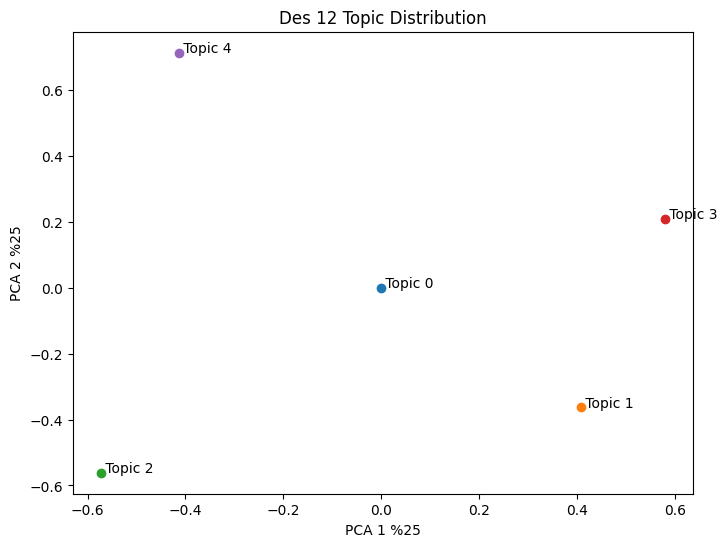

Every topic with its most relevant words.


Topic 0 = ser, empresa, transporte, subsidio

Topic 1 = acuerdo, gente, problema, pagar

Topic 2 = opinion, responder, tema, tener

Topic 3 = ser, subsidiar, bien, publico

Topic 4 = tema, comunidad, interesante, resultar



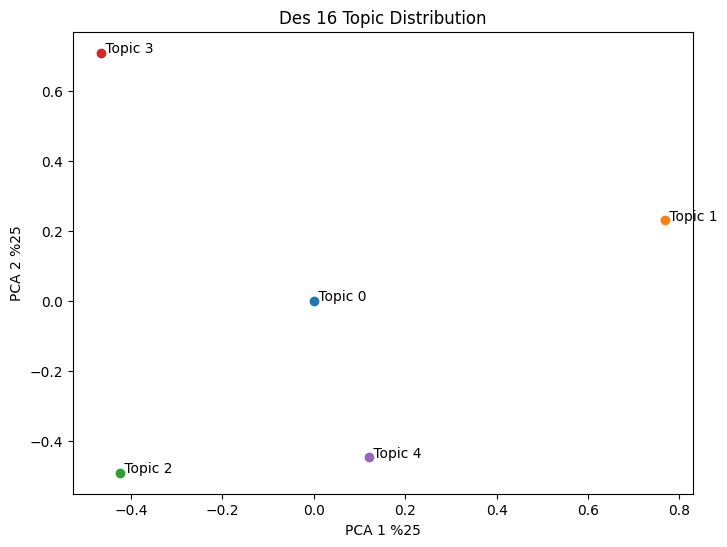

Every topic with its most relevant words.


Topic 0 = horario, menos, mas, carga

Topic 1 = mas, clase, tiempo, ser

Topic 2 = excursion, taller, herramienta, ayudar

Topic 3 = curso, diseno, extracurricular, gratuito

Topic 4 = comida, kiosco, mas, opcion



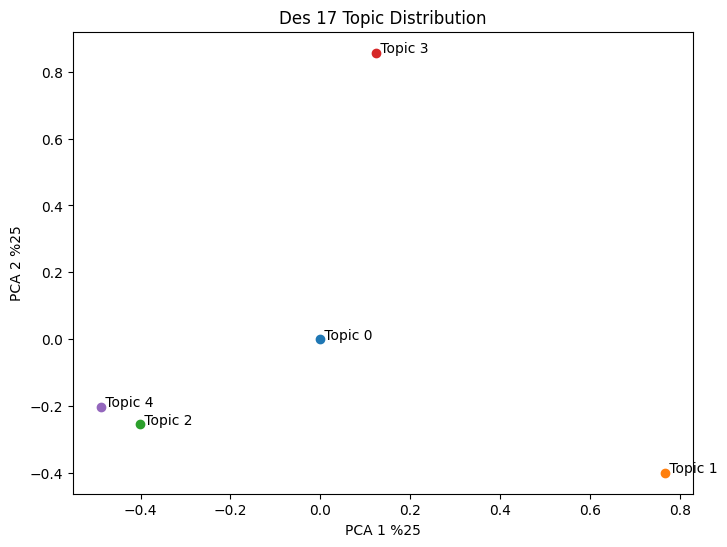

Every topic with its most relevant words.


Topic 0 = horario, carga, tener, cursada

Topic 1 = tiempo, clase, tener, almorzar

Topic 2 = materia, fundamento, ciclo, exigencia

Topic 3 = cursada, malos, ser, eternos

Topic 4 = tiempo, cursada, ciclo, fundamento



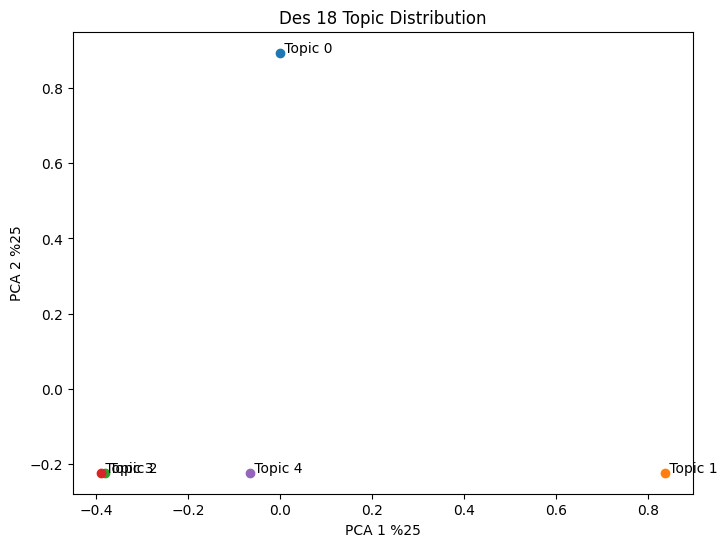

In [5]:
model = TruncatedSVD
for des, textos in df_desafio.items():
    
    num_top_words = 4

    visualize_topics(model, textos, num_top_words, n_components = 5, des=des) 

## 2. Latent Dirichlet  Allocation

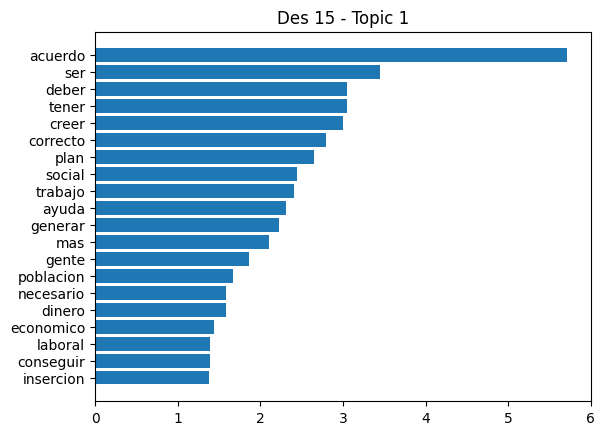

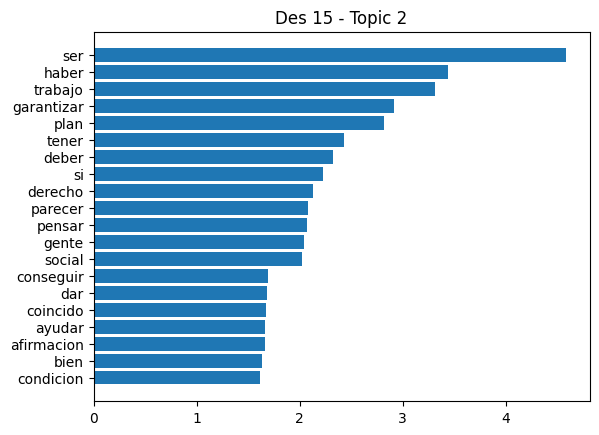

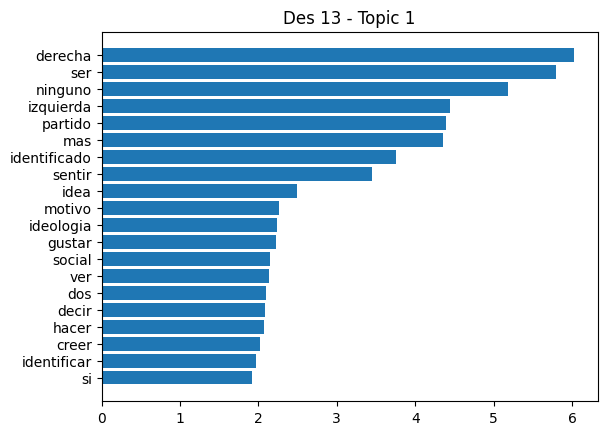

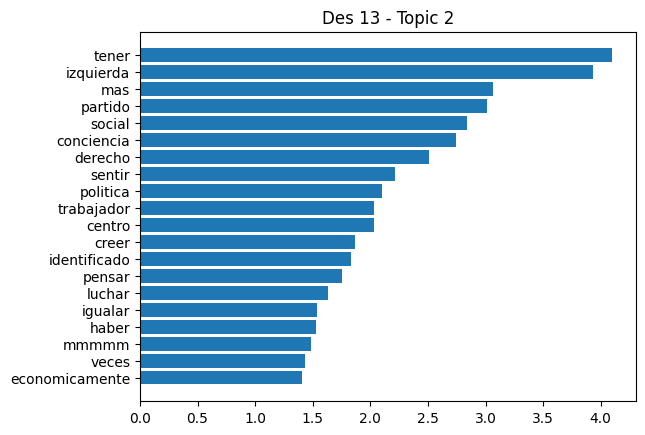

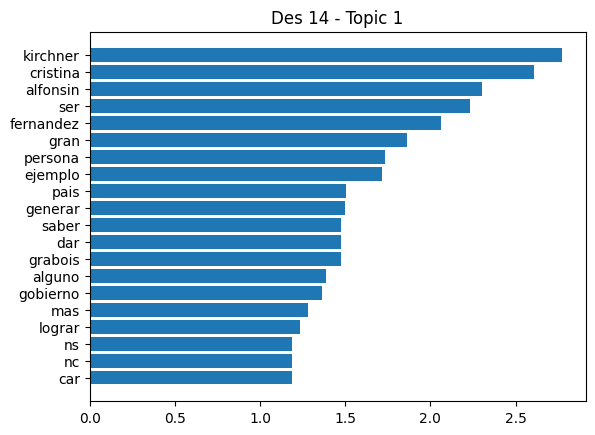

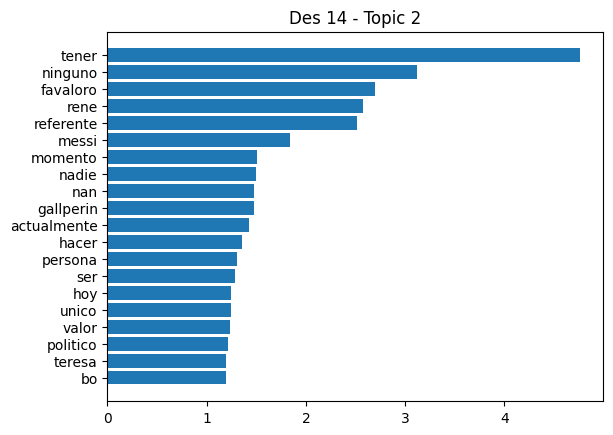

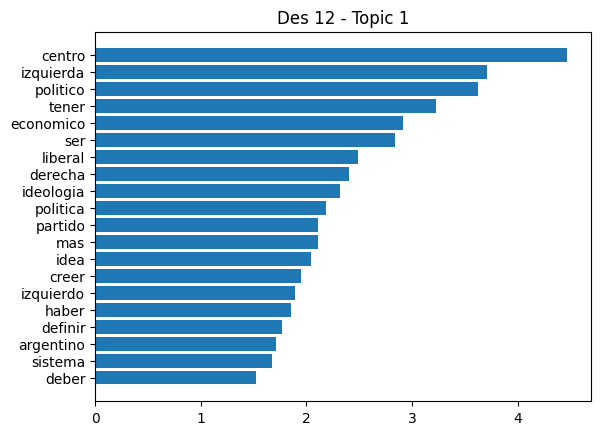

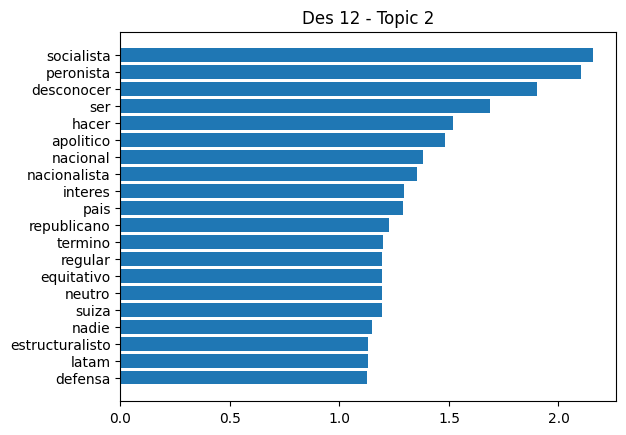

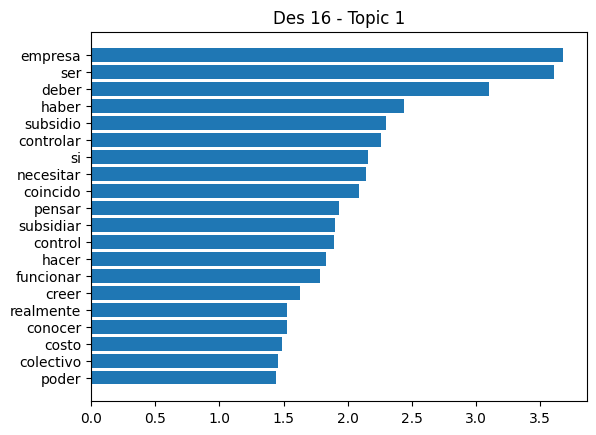

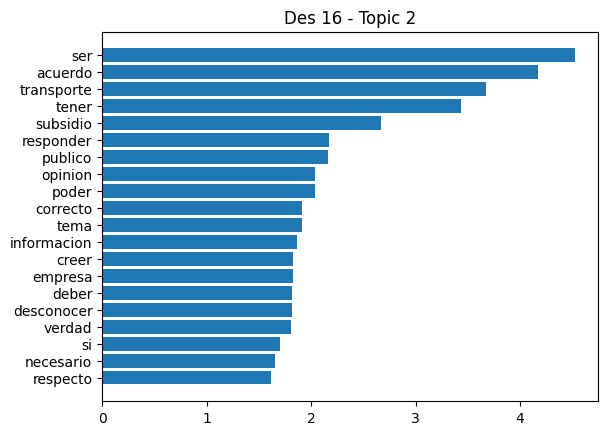

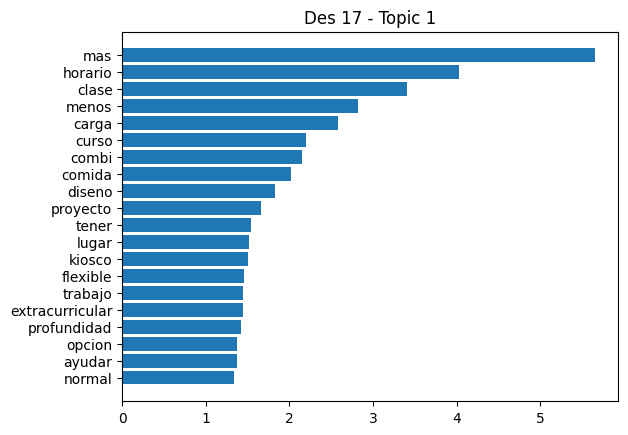

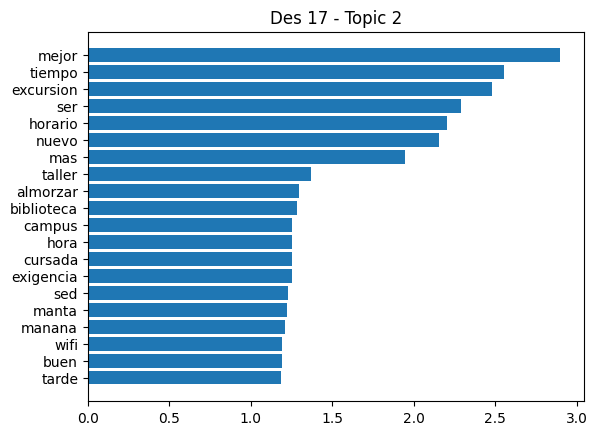

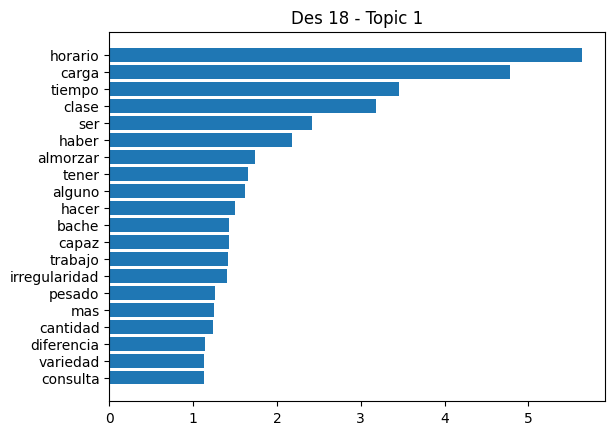

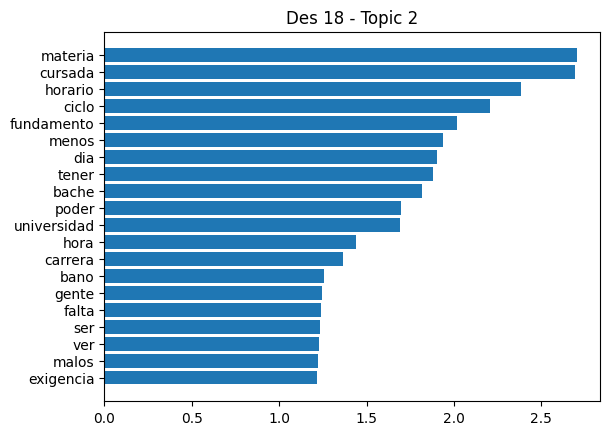

In [6]:
# Define data and model

n_components = 6

for des, textos in df_desafio.items():
    
    model = LatentDirichletAllocation
    

    words, wheights = words_wheights(model, textos, n_components)
    
    for i in range(n_components):
        plot_word(words[i], wheights[i], plot_title = f'Des {des} - Topic {i+1}')

### Evaluacion

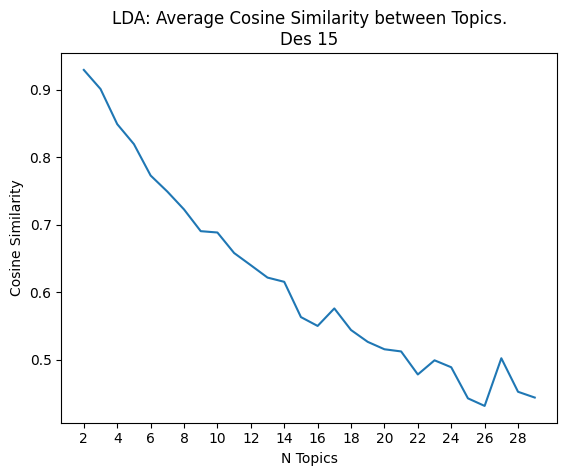

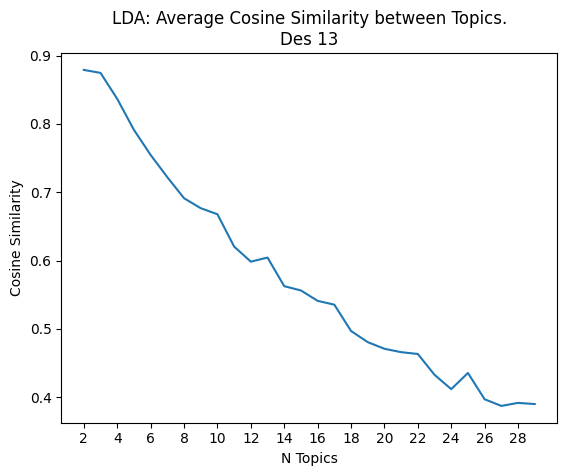

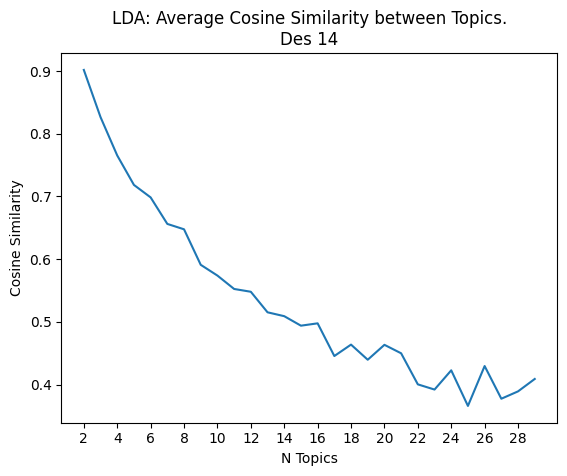

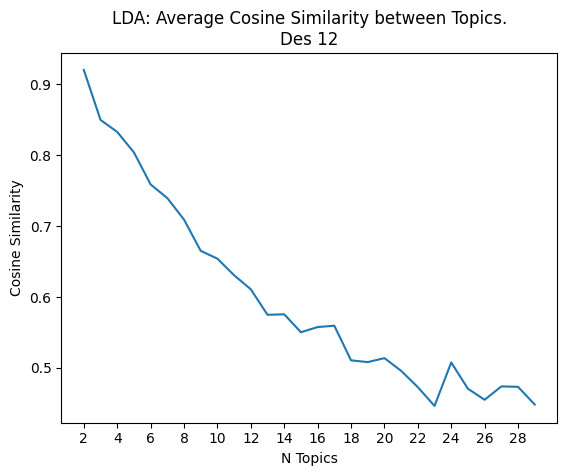

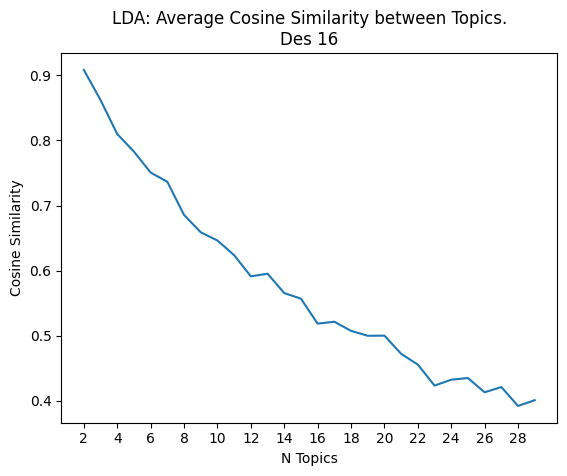

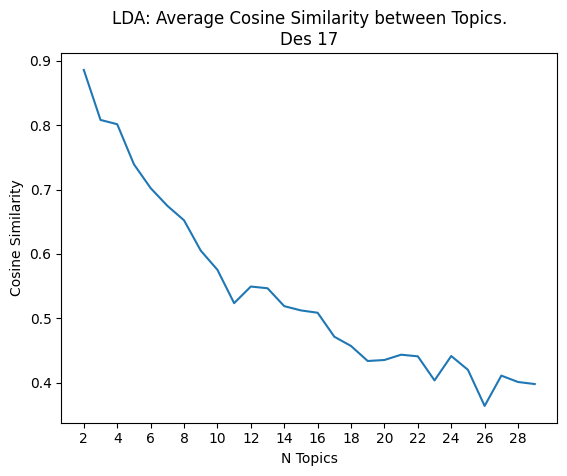

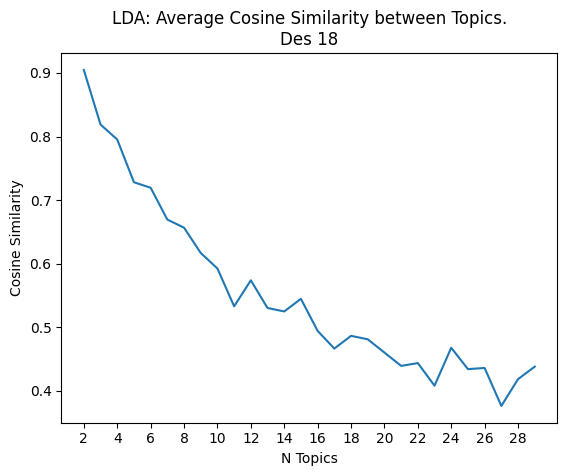

In [19]:
for des, textos in df_desafio.items():

    n_topics = 30

    all_cs = []
    for i in range(2, n_topics):
        mean_cos_simil = evaluate_coherence(model, textos, n_topics = i)
        all_cs.append(mean_cos_simil)

    plt.plot(range(2, n_topics), all_cs)
    plt.title(f'LDA: Average Cosine Similarity between Topics.\nDes {des}')
    plt.xlabel('N Topics')
    plt.ylabel('Cosine Similarity')
    plt.xticks(range(2, n_topics, 2), range(2, n_topics, 2))
    plt.show()

Every topic with its most relevant words.


Topic 0 = haber, plan, ser, deber

Topic 1 = ser, plan, coincido, tener

Topic 2 = acuerdo, ser, tener, creer

Topic 3 = generar, gente, deber, acuerdo



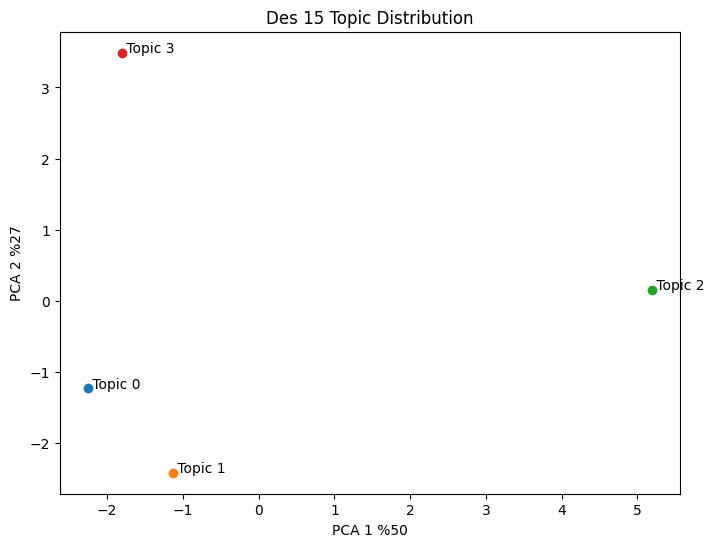

Every topic with its most relevant words.


Topic 0 = izquierda, mas, ninguno, partido

Topic 1 = derecha, mas, sentir, identificado

Topic 2 = izquierda, centro, ser, dos

Topic 3 = veces, si, social, politica



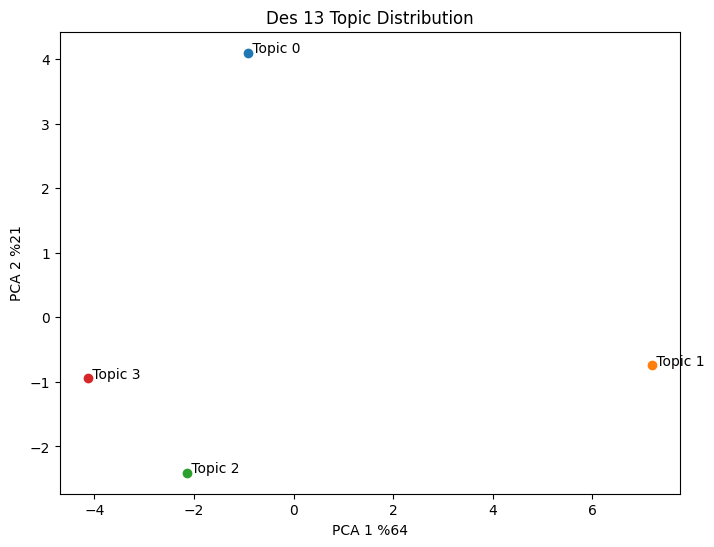

Every topic with its most relevant words.


Topic 0 = alfonsin, gallperin, alguno, car

Topic 1 = tener, ninguno, referente, messi

Topic 2 = rene, favaloro, nan, dar

Topic 3 = referente, ejemplo, kirchner, favaloro



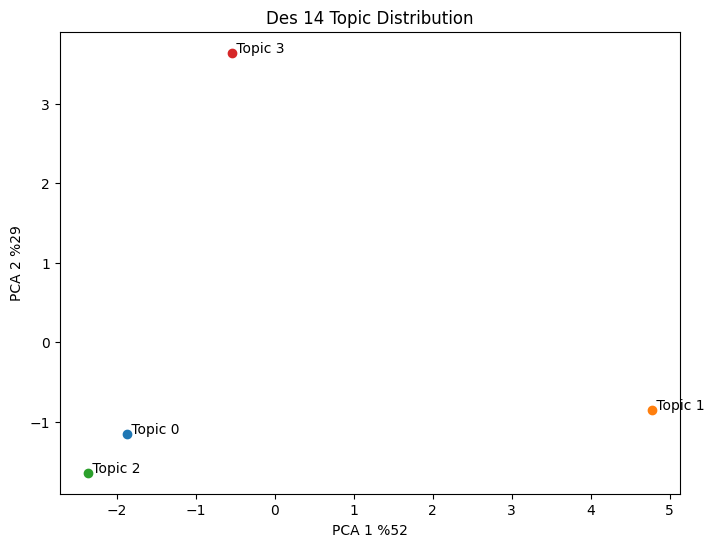

Every topic with its most relevant words.


Topic 0 = socialista, apolitico, argentino, formado

Topic 1 = izquierda, ser, tener, politico

Topic 2 = centro, desconocer, derecha, liberal

Topic 3 = ser, idea, politico, definir



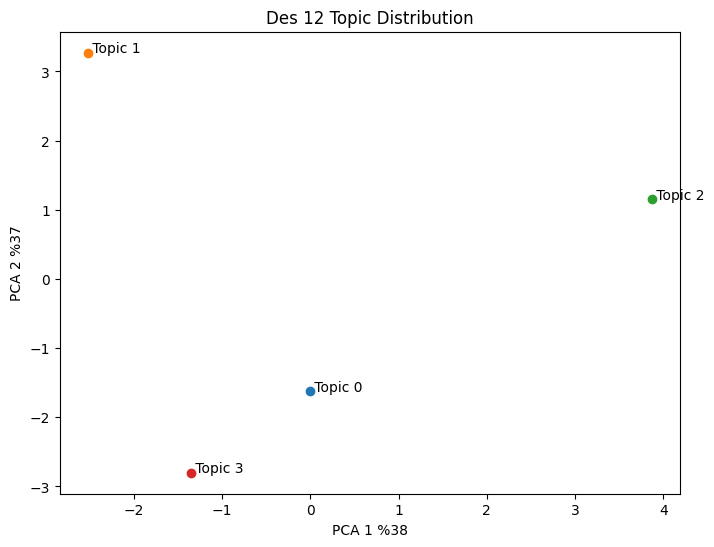

Every topic with its most relevant words.


Topic 0 = ser, subsidio, desconocer, aplicar

Topic 1 = empresa, pensar, ser, poder

Topic 2 = ser, subsidiar, deber, tener

Topic 3 = acuerdo, transporte, ser, tener



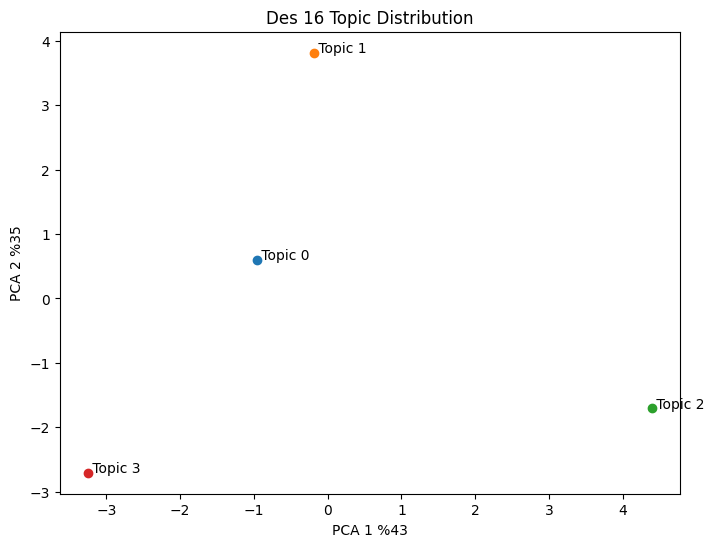

Every topic with its most relevant words.


Topic 0 = horario, mas, menos, mejor

Topic 1 = mas, horario, flexible, combi

Topic 2 = excursion, comida, manta, biblioteca

Topic 3 = mas, diseno, curso, clase



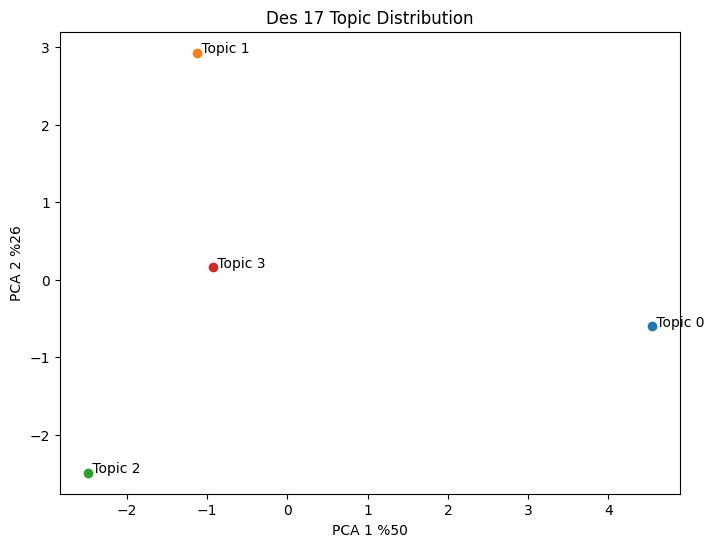

Every topic with its most relevant words.


Topic 0 = horario, carga, clase, almorzar

Topic 1 = ciclo, materia, fundamento, universidad

Topic 2 = bache, parcial, ser, gente

Topic 3 = cursada, tiempo, horario, ser



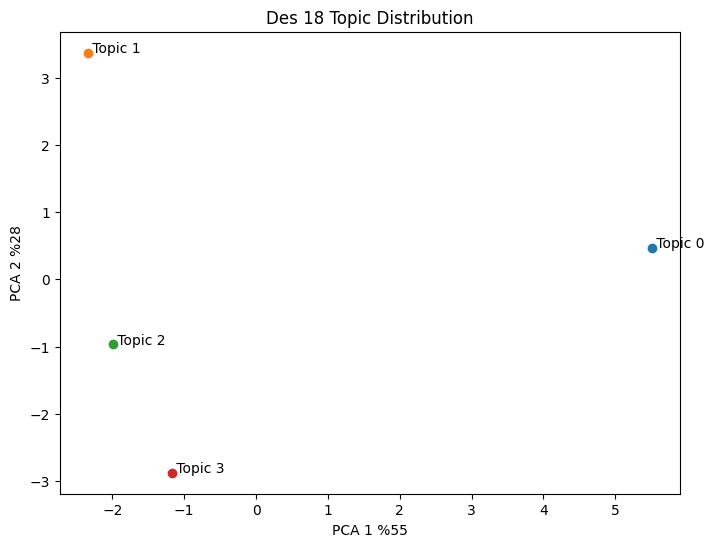

In [20]:
for des, textos in df_desafio.items():

    num_top_words = 4

    visualize_topics(model, textos, num_top_words, n_components=4, des=des)

## 3. BERTopic 

- [Documentation](https://maartengr.github.io/BERTopic/api/bertopic.html)
- [Friendly Documentation](https://maartengr.github.io/BERTopic/index.html)
- [Use Case Example](https://www.pinecone.io/learn/bertopic/)

In [27]:
# dict with desafio and its preprocesed texts

pp = Preprocess(lemma=False)

df_desafio = {}

for des in df.desafio.unique():
    value = df[df['desafio']==des].texto.tolist()
    value = pp.preprocess(value)
    df_desafio[des] = value

In [30]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.cluster import MiniBatchKMeans

cluster_model = MiniBatchKMeans(n_clusters=4) # KNN como alternativa a HDBSCAN

def bert_model_create(cluster_model = None):
    embedding_model = SentenceTransformer('bert-base-nli-mean-tokens') # embedings pre entrenado en español
    umap_model = UMAP(n_neighbors=3)
    
    # Kmeans works better for small desafio, HDBSCAN for big ones
    if not cluster_model:
        cluster_model = HDBSCAN(gen_min_span_tree=True, prediction_data=True)

    # Bag of words
    vectorizer_model = CountVectorizer(ngram_range=(1, 3))
    
    model = BERTopic(
        vectorizer_model = vectorizer_model,
        umap_model = umap_model,
        hdbscan_model = cluster_model,
        embedding_model = embedding_model,
        language='spanish',
        calculate_probabilities=True,
        verbose=True,
        min_topic_size = 3,            # most important hyperparameter for small dataset (lower it)
        nr_topics="auto"
    )
    
    return model

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2022-12-26 10:03:14,869 - BERTopic - Transformed documents to Embeddings
2022-12-26 10:03:16,335 - BERTopic - Reduced dimensionality
2022-12-26 10:03:16,403 - BERTopic - Clustered reduced embeddings
2022-12-26 10:03:17,326 - BERTopic - Reduced number of topics from 4 to 4


<div style="text-align:center;"><span style="font-size:48px;color:blue;">Desafío 12</span></div>

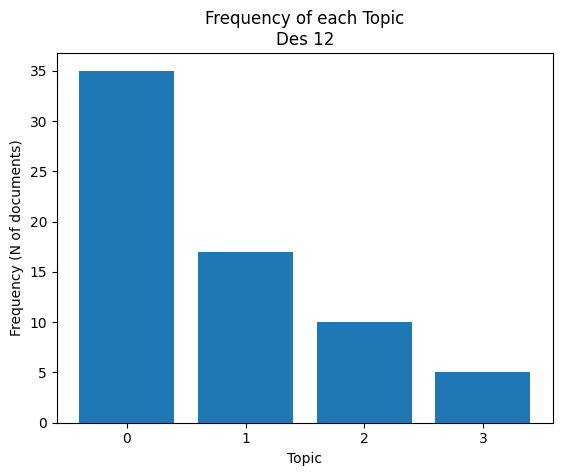

In [38]:
key = '12'

documents = df_desafio[key]

cluster_model = MiniBatchKMeans(n_clusters=4) # Probamos con KNN

model = bert_model_create(cluster_model)
bertopic_plots(model, documents, key)

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2022-12-26 10:01:02,711 - BERTopic - Transformed documents to Embeddings
2022-12-26 10:01:04,149 - BERTopic - Reduced dimensionality
2022-12-26 10:01:04,160 - BERTopic - Clustered reduced embeddings
2022-12-26 10:01:06,156 - BERTopic - Reduced number of topics from 7 to 7


<div style="text-align:center;"><span style="font-size:48px;color:blue;">Desafío 13</span></div>

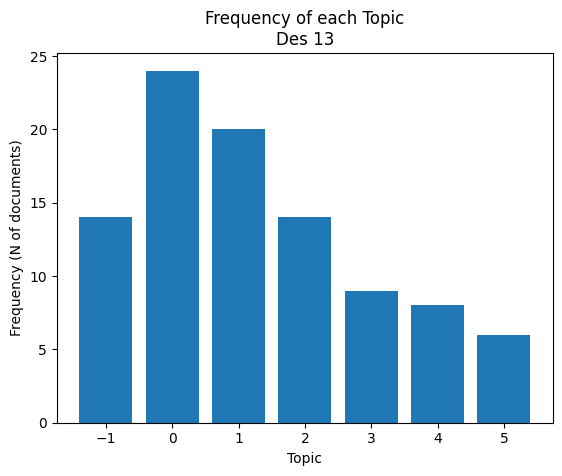






TOPIC 4 most representative documents:



In [32]:
key = '13'

documents = df_desafio[key]

model = bert_model_create()
bertopic_plots(model, documents, key)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2022-12-26 10:01:43,600 - BERTopic - Transformed documents to Embeddings
2022-12-26 10:01:45,048 - BERTopic - Reduced dimensionality
2022-12-26 10:01:45,143 - BERTopic - Clustered reduced embeddings
2022-12-26 10:01:46,173 - BERTopic - Reduced number of topics from 4 to 4


<div style="text-align:center;"><span style="font-size:48px;color:blue;">Desafío 14</span></div>

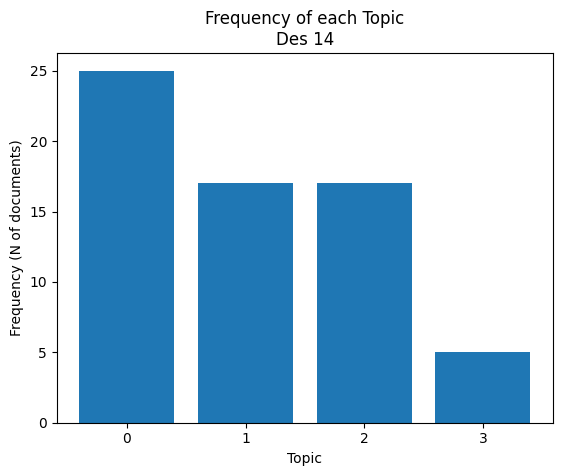

In [34]:
key = '14'

documents = df_desafio[key]


cluster_model = MiniBatchKMeans(n_clusters=4) # Probamos con KNN


model = bert_model_create(cluster_model)
bertopic_plots(model, documents, key)

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2022-12-26 10:27:06,671 - BERTopic - Transformed documents to Embeddings
2022-12-26 10:27:08,183 - BERTopic - Reduced dimensionality
2022-12-26 10:27:08,193 - BERTopic - Clustered reduced embeddings
2022-12-26 10:27:09,440 - BERTopic - Reduced number of topics from 6 to 6


<div style="text-align:center;"><span style="font-size:48px;color:blue;">Desafío 15</span></div>

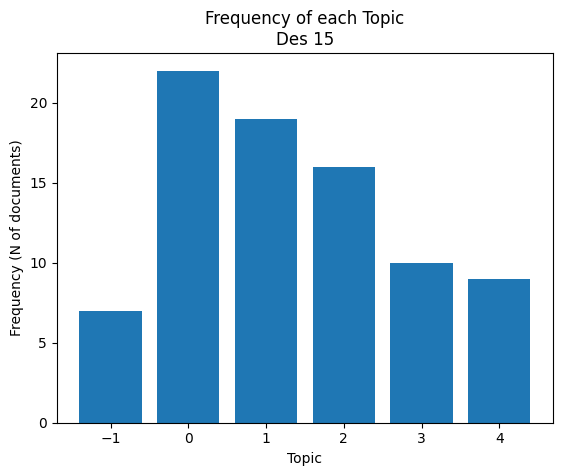






TOPIC 0 most representative documents:



In [41]:
key = '15'

documents = df_desafio[key]

model = bert_model_create()
bertopic_plots(model, documents, key)

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2022-12-26 10:02:04,607 - BERTopic - Transformed documents to Embeddings
2022-12-26 10:02:06,111 - BERTopic - Reduced dimensionality
2022-12-26 10:02:06,188 - BERTopic - Clustered reduced embeddings
2022-12-26 10:02:07,561 - BERTopic - Reduced number of topics from 4 to 4


<div style="text-align:center;"><span style="font-size:48px;color:blue;">Desafío 16</span></div>

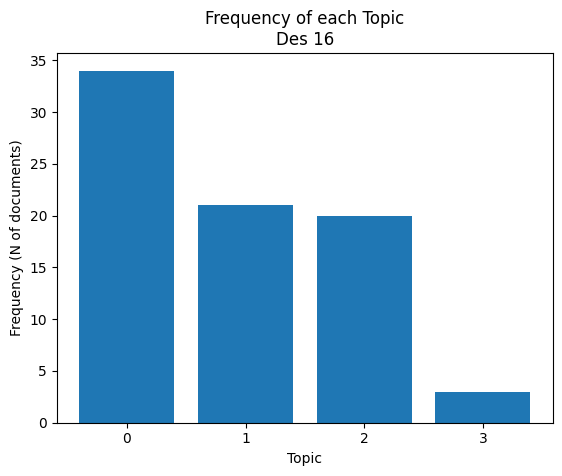

In [35]:
key = '16'

documents = df_desafio[key]

cluster_model = MiniBatchKMeans(n_clusters=4) # Probamos con KNN

model = bert_model_create(cluster_model)
bertopic_plots(model, documents, key)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2022-12-26 10:02:29,150 - BERTopic - Transformed documents to Embeddings
2022-12-26 10:02:30,582 - BERTopic - Reduced dimensionality
2022-12-26 10:02:30,651 - BERTopic - Clustered reduced embeddings
2022-12-26 10:02:31,753 - BERTopic - Reduced number of topics from 4 to 4


<div style="text-align:center;"><span style="font-size:48px;color:blue;">Desafío 17</span></div>

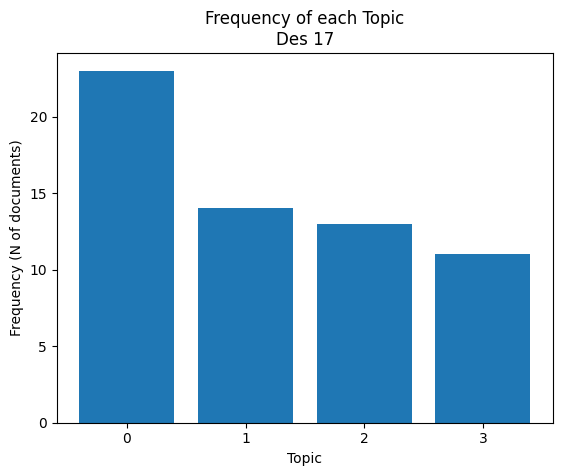

In [36]:
key = '17'

documents = df_desafio[key]

cluster_model = MiniBatchKMeans(n_clusters=4) # Probamos con KNN

model = bert_model_create(cluster_model)
bertopic_plots(model, documents, key)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2022-12-26 10:02:51,304 - BERTopic - Transformed documents to Embeddings
2022-12-26 10:02:53,206 - BERTopic - Reduced dimensionality
2022-12-26 10:02:53,277 - BERTopic - Clustered reduced embeddings
2022-12-26 10:02:54,497 - BERTopic - Reduced number of topics from 4 to 4


<div style="text-align:center;"><span style="font-size:48px;color:blue;">Desafío 18</span></div>

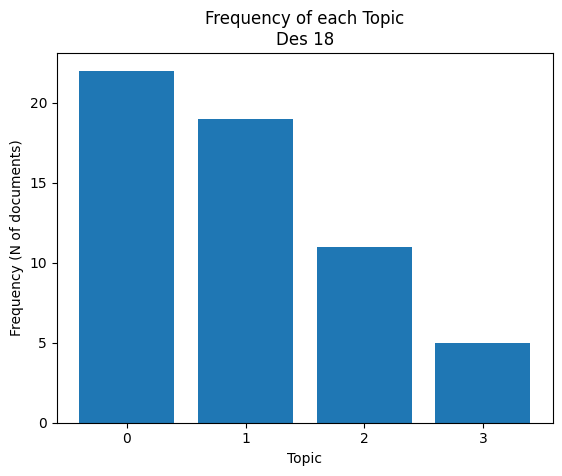

In [37]:
key = '18'

documents = df_desafio[key]

cluster_model = MiniBatchKMeans(n_clusters=4) # Probamos con KNN

model = bert_model_create(cluster_model)
bertopic_plots(model, documents, key)